## 标签图像优化
类似于对二值图像进行形态学操作，对标签图像也可以进行优化。本notebook展示了如何实现这一点。

另请参阅
* [scikit-image的无重叠扩展分割标签教程](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html)

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
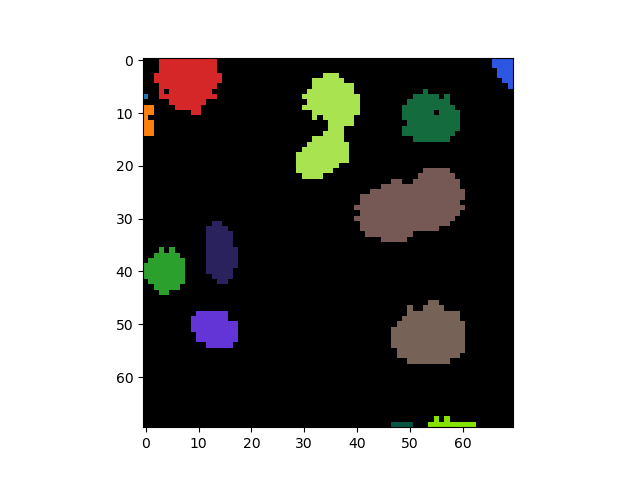

In [2]:
label_image = cle.gauss_otsu_labeling(imread("../../data/mitosis_mod.tif"), outline_sigma=0)
label_image

## 侵蚀标签
在侵蚀标签时，我们需要注意对象可能会分裂成两个。这可能是有意为之的，例如为了区分上面例子中接触的细胞核。

cl.OCLArray([[0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 0, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
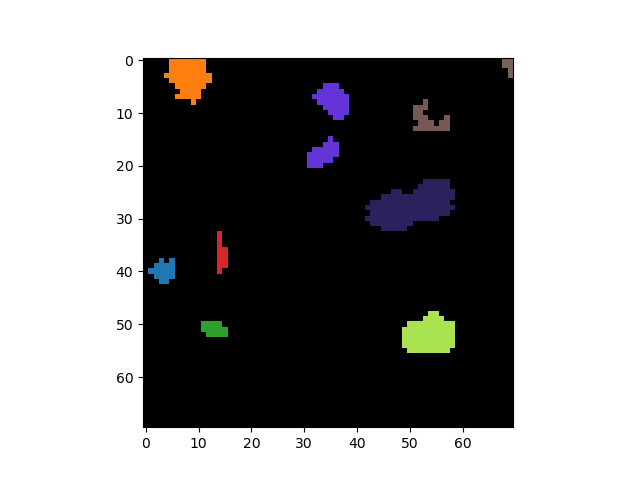

In [3]:
eroded_label_image = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=False)
eroded_label_image

cl.OCLArray([[ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0,  0, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
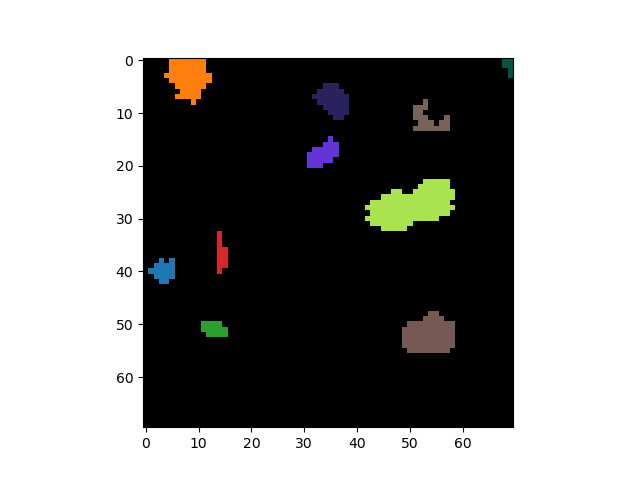

In [4]:
eroded_label_image2 = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=True)
eroded_label_image2

## 膨胀标签
然后我们可以再次膨胀标签，使其大致恢复到原始大小。如果分割的对象普遍太小，这也可能很有用。

cl.OCLArray([[ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  2, ..., 10, 10, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
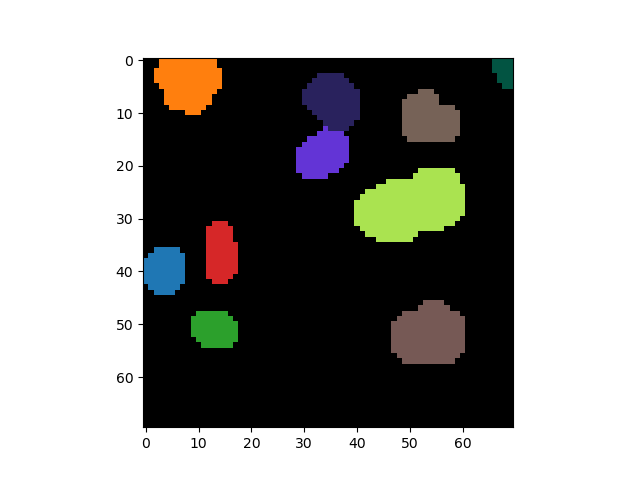

In [5]:
dilated_label_image = cle.dilate_labels(eroded_label_image2, 
                                        radius=2)
dilated_label_image

## 开运算和闭运算标签
标签图像的开运算和闭运算与二值图像类似。唯一的区别是当标签接触时，它们不能再扩展。

请注意，开运算标签可能会使小标签消失。

cl.OCLArray([[0, 0, 0, ..., 9, 9, 9],
       [0, 0, 0, ..., 9, 9, 9],
       [0, 0, 2, ..., 9, 9, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
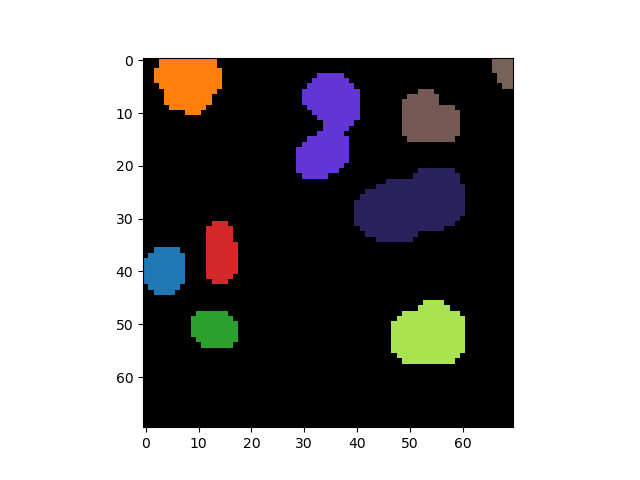

In [6]:
opened_label_image = cle.opening_labels(label_image,
                                        radius=2)
opened_label_image

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
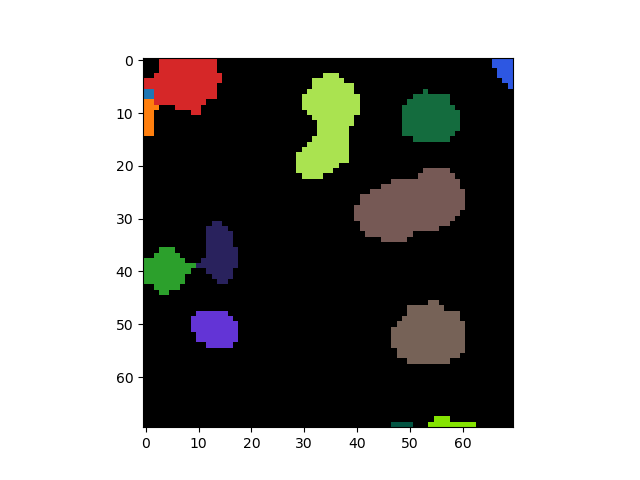

In [7]:
closed_label_image = cle.closing_labels(label_image,
                                        radius=2)
closed_label_image

## 练习
使用上面介绍的操作，使这个标签图像中的小对象消失。

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
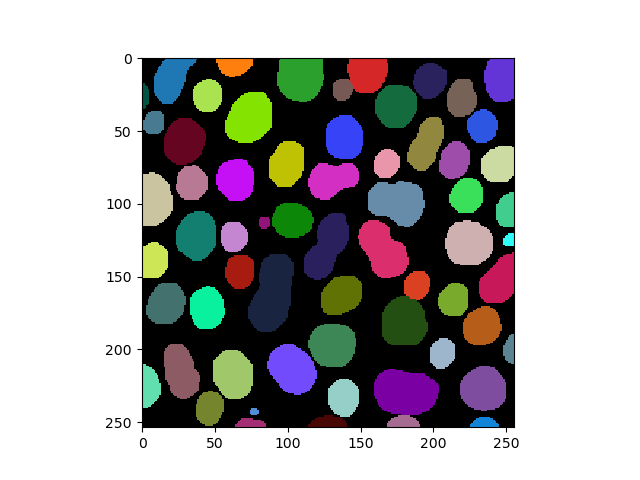

In [8]:
label_blobs = cle.asarray(imread("../../data/blobs_labeled.tif")).astype(np.uint32)
label_blobs